In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv


# Load csv file

In [2]:
train_csv_path = '/kaggle/input/fashionmnist/fashion-mnist_train.csv'
test_csv_path = '/kaggle/input/fashionmnist/fashion-mnist_test.csv'

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# remove first column and convert to numpy array, transform to [0..1]
x_train = train_df.drop(columns=['label']).values / 255
y_train = train_df['label'].values
x_test = test_df.drop(columns=['label']).values / 255
y_test = test_df['label'].values

# Show a sample image

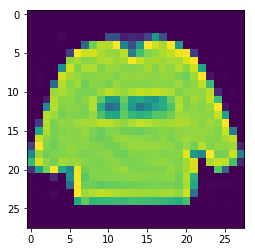

In [3]:
import matplotlib.pyplot as plt

sample_image = x_train[0,:].reshape((28,28))
plt.imshow(sample_image)


# CNN model

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [5]:
image_rows = 28
image_cols = 28
batch_size = 32
image_shape = (image_rows, image_cols, 1)

In [6]:
x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)

In [7]:
BatchNormalization?

In [8]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax'),
])

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [10]:
max_epochs = 50

history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=max_epochs,
    verbose=1,
)

Epoch 1/50
60000/60000 [==============================] - 10s 164us/step - loss: 0.4301 - accuracy: 0.8418
Epoch 2/50
60000/60000 [==============================] - 7s 115us/step - loss: 0.3053 - accuracy: 0.8893
Epoch 3/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.2746 - accuracy: 0.8992
Epoch 4/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.2562 - accuracy: 0.9064
Epoch 5/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.2394 - accuracy: 0.9114
Epoch 6/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.2278 - accuracy: 0.9166
Epoch 7/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.2219 - accuracy: 0.9187
Epoch 8/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.2130 - accuracy: 0.9233
Epoch 9/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.2067 - accuracy: 0.9237
Epoch 10/50
60000/60000 [====================

In [11]:
scores = model.evaluate(x_test, y_test, verbose=1)
scores

10000/10000 [==============================] - 1s 64us/step


[0.37020718071386216, 0.9111999869346619]

In [12]:
history.history

{'loss': [0.43012679127057396,
  0.3052555834531784,
  0.27463079919815064,
  0.25620171347856524,
  0.23944542283217113,
  0.22782297120889028,
  0.22192657568454743,
  0.21295720454057057,
  0.20669999319314958,
  0.2016031080186367,
  0.1924618828455607,
  0.18956506851216157,
  0.18352355275551477,
  0.18328846347332,
  0.17285347145001093,
  0.17220003825028737,
  0.16718889223535854,
  0.16515289194583893,
  0.16194860798915228,
  0.1574353635450204,
  0.15612399610678354,
  0.15223624619642895,
  0.14874438482224941,
  0.1462963725109895,
  0.14491070413986842,
  0.14237869804998238,
  0.13886043441096943,
  0.13362470319171746,
  0.13358403249184292,
  0.13094190907776357,
  0.13073463055888812,
  0.12693616908987362,
  0.12324758875866731,
  0.12436843335280816,
  0.11907042186756929,
  0.1203061003362139,
  0.11793725871344407,
  0.11630300234407187,
  0.11580064924657345,
  0.11207705721159776,
  0.1119590420273443,
  0.10840071661472321,
  0.10751882401928306,
  0.107657036

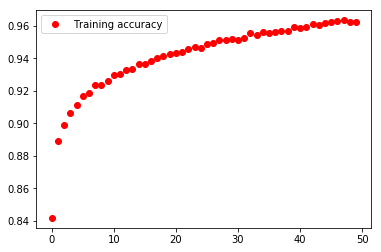

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
acc = history.history['accuracy']
epoches = range(len(acc))

plt.plot(epoches, acc, 'ro', label='Training accuracy')
plt.legend()
plt.show()